<a href="https://colab.research.google.com/github/SagarSonar2698/jambore_education/blob/main/Jamboree_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


# loading dataframe

In [ ]:
df = pd.read_csv('/content/Jamboree_Admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Droping the unique row Identifier if you see any. This step is important as we don’t want our model to build some understanding based on row numbers.

In [ ]:
df.drop(columns = ['Serial No.'],inplace = True)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.rename(columns = {'LOR_' : 'LOR','Chance_of_Admit_' : 'Chance_of_Admit'},inplace = True)

In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


refrencing above table we can infer that data contains no null values.

In [ ]:
df.isna().sum()

GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

converting data types of few columns into object datatype

In [ ]:
df_dict = {'University_Rating' : 'category' ,'Research' : 'category' }

df = df.astype(df_dict)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE_Score          500 non-null    int64   
 1   TOEFL_Score        500 non-null    int64   
 2   University_Rating  500 non-null    category
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance_of_Admit    500 non-null    float64 
dtypes: category(2), float64(4), int64(2)
memory usage: 24.9 KB


In [ ]:
df.describe()

,GRE_Score,TOEFL_Score,SOP,LOR,CGPA,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


In [ ]:
df.describe(include = ['category'])

,University_Rating,Research
count,500,500
unique,5,2
top,3,1
freq,162,280


# Basic data exploration

## Graphical analysis

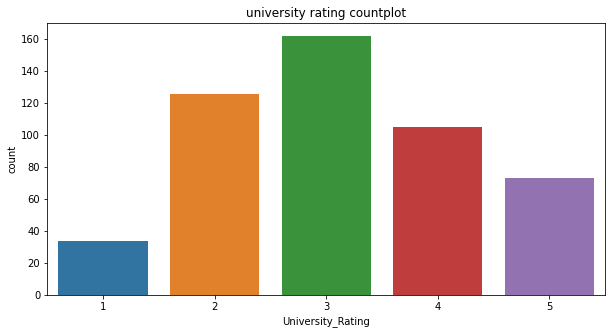

In [ ]:
plt.figure(figsize = (10,5))
plt.title('university rating countplot')
sns.countplot(data = df , x = 'University_Rating')
plt.show()

in this data most of the universities are of rating 3

In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


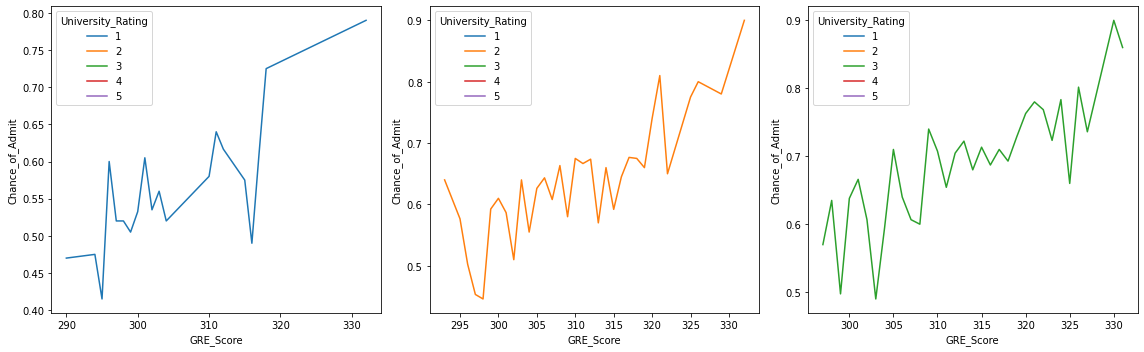

In [ ]:
uni_rating_1 = df[df['University_Rating'] == 1]
uni_rating_2 = df[df['University_Rating'] == 2]
uni_rating_3 = df[df['University_Rating'] == 3]

plt.figure(figsize = (16,5))
plt.subplot(1,3,1)
sns.lineplot(data = uni_rating_1 , x = 'GRE_Score' , y = 'Chance_of_Admit',hue = 'University_Rating',ci= None)

plt.subplot(1,3,2)
sns.lineplot(data = uni_rating_2,x = 'GRE_Score',y = 'Chance_of_Admit' , hue = 'University_Rating',ci = None)

plt.subplot(1,3,3)
sns.lineplot(data = uni_rating_3,x = 'GRE_Score',y = 'Chance_of_Admit' , hue = 'University_Rating',ci = None)
plt.tight_layout()

**INSIGHT**

the chance of admission above 60% in rating 1 university will go after gre_score above 315.

the chance of admission above 60% in rating 2 and 3 university will go after gre_score above 300.





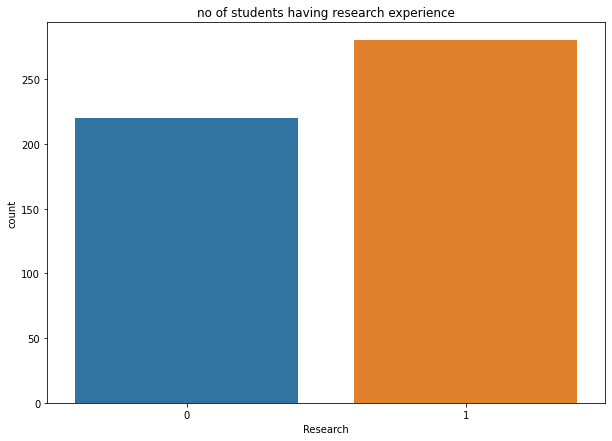

In [ ]:
plt.figure(figsize = (10,7))
plt.title('no of students having research experience')
sns.countplot(data = df , x = 'Research')
plt.show()

in this data we can see around 220 students have no reseaarch experience and around 280 students have research experience


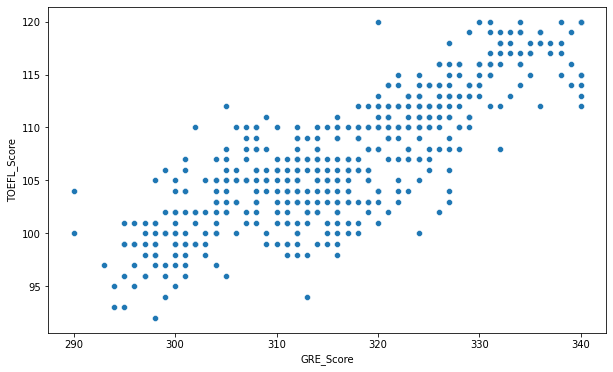

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df ,x = 'GRE_Score',y = 'TOEFL_Score')
plt.show()

here we can see TOEFL_SCORE IS highly correlated with GRE_score

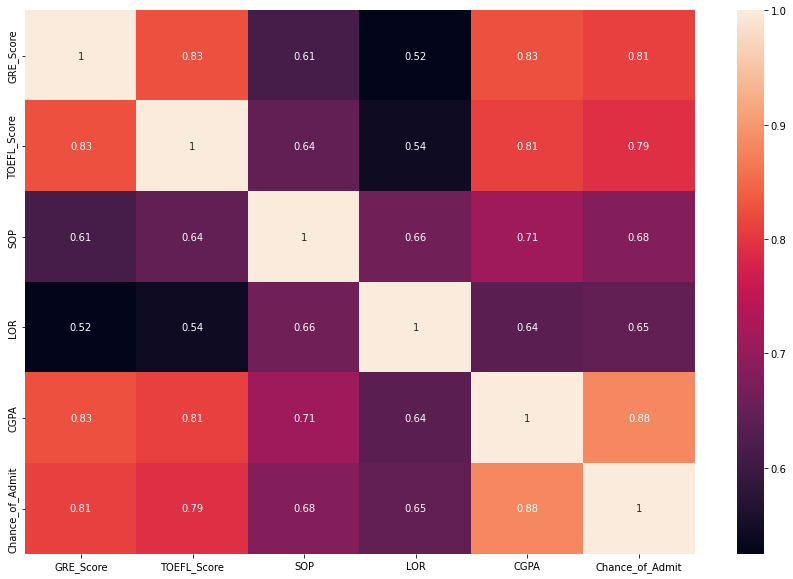

In [ ]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(data = corr , annot = True)
plt.show()

here we can see , 
1) GRE_score and TOEFL_score are highly correlated hence someone who is preparing for GRE can score well in TOEFL too.

2)CGPA has high correlation with score in both the exams so someone who has has high CGPA has higher probability for higher score in both the exams.



In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### **creating new categorical feature** 

In [ ]:
bins = [0,0.2,0.40,0.60,0.8,1]
labels = ['very_low','low','moderate','high','very_high']
df['chance'] = pd.cut(df['Chance_of_Admit'],bins = bins,labels = labels)

In [ ]:
bins = [0,6,7,8,10]
labels = ['low','moderate','high','very_high']
df['CGPA_label'] = pd.cut(df['CGPA'],bins = bins,labels = labels)

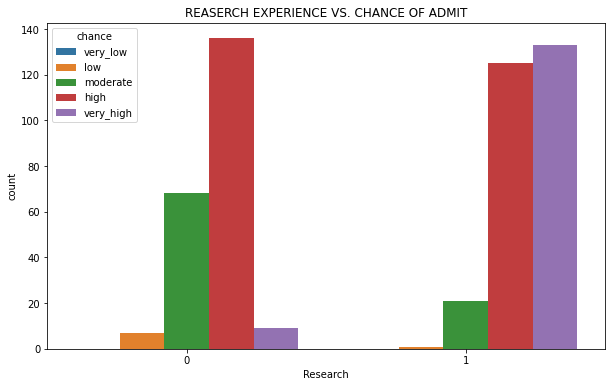

In [ ]:
plt.figure(figsize = (10,6))
plt.title('REASERCH EXPERIENCE VS. CHANCE OF ADMIT')
sns.countplot(data = df,x = 'Research' , hue = 'chance')
plt.show()

Here we can see the people who have reaserch experice most of the population among them fall into category of high and very high chance of admission.
where as people who have no research experience the higher no of population comes under moderate or high chance of admission.

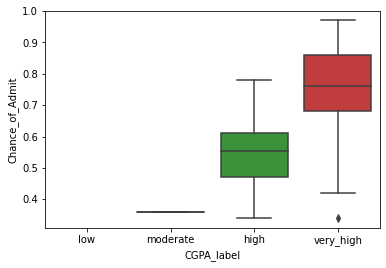

In [ ]:
sns.boxplot(data = df , x = 'CGPA_label',y = 'Chance_of_Admit')

**insight**

candidates having CGPA in range of 7 to 8 have 55% chance of admission where as candidate having CGPA in range of 8 to 10  have 75% chance of admission 

**Recommendation**

jamboore can focus on graduation study content production that will create a students with higher CGPA which leads to higher chance of getting admission

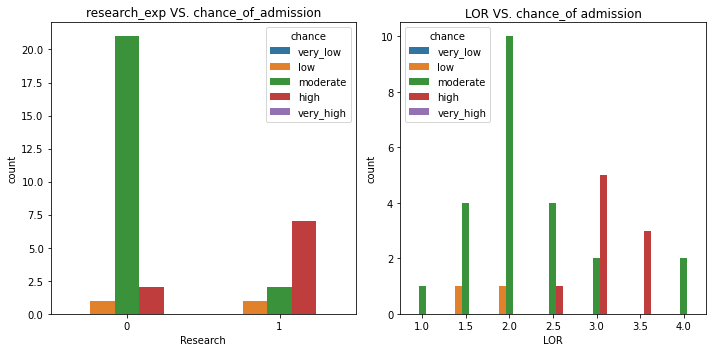

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.title('research_exp VS. chance_of_admission')
sns.countplot(data = df[df['University_Rating'] == 1],x = 'Research',hue = 'chance')
plt.subplot(1,2,2)
plt.title('LOR VS. chance_of admission')
sns.countplot(data = df[df['University_Rating'] == 1],x = 'LOR',hue = 'chance')
plt.tight_layout()

**INSIGHT**

for university_ranking _1 college , chance of admit also depend on research_exp as well as letter of recommendation . moderate chance occure in case of someone have no research experience but someone have research exp majority of people have high chance of admission in tier_1 .

this can be new bussiness apportunity to jamboree education where they can  also list research_opportunity for undergrads which increse their chance of admission in tier 1  college


In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'chance'],
      dtype='object')

In [ ]:
sns.boxplot(data = df,x = )

In [ ]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit', 'chance'],
      dtype='object')

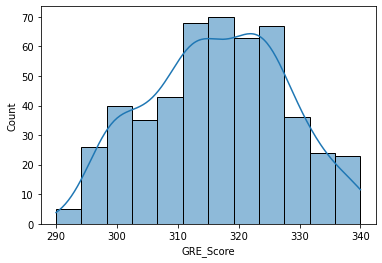

In [ ]:
sns.histplot(data= df,x = 'GRE_Score',kde =True)
plt.show()

distribution of Gre_SCORE is in normal distribution where most of candidate score lies between 310 - 320 marks

# **Regression Analysis**

In [ ]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,chance
0,337,118,4,4.5,4.5,9.65,1,0.92,very_high
1,324,107,4,4.0,4.5,8.87,1,0.76,high
2,316,104,3,3.0,3.5,8.00,1,0.72,high
3,322,110,3,3.5,2.5,8.67,1,0.80,high
4,314,103,2,2.0,3.0,8.21,0,0.65,high


### creating standerdize data using minmax scaler and one hot encoading for regression analysis

In [ ]:
df_new = df.copy(deep = True)

In [ ]:
df_new.drop(columns=['chance'],inplace = True)

In [ ]:
df_new.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

**standerdization**

In [ ]:
columns = ['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']
for column in columns:
  df_new[column] = (df_new[column] - np.mean(df_new[column])) / np.std(df_new[column])

In [ ]:
df_dict = {'University_Rating' : 'category' ,'Research' : 'category' }

df_new = df_new.astype(df_dict)

In [ ]:
enc = OneHotEncoder()
df_new['University_Rating_new']=df_new['University_Rating'].cat.codes
enc_data=pd.DataFrame(enc.fit_transform(df_new[['University_Rating','Research']]).toarray())


In [ ]:
enc_data.drop(columns = [4,6],inplace=True)

we have droped a one categorica; value column from both the one hat encoading of both the categorical column to reduce a risk of multicollinearity

In [ ]:
enc_data.head()

,0,1,2,3,5
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0


In [ ]:
enc_data.rename(columns={0: "University_Rating_1", 1: "University_Rating_2", 2: "University_Rating_3", 3 :'University_Rating_4' ,5 :'Research_no_exp'},inplace = True)

In [ ]:
final_df= df_new.join(enc_data)

In [ ]:
final_df.drop(columns = ['University_Rating','Research','University_Rating_new'],inplace = True)

# **linear Regression with single variable**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
final_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit',
       'University_Rating_1', 'University_Rating_2', 'University_Rating_3',
       'University_Rating_4', 'Research_no_exp'],
      dtype='object')

In [ ]:
x = final_df['GRE_Score'].values
y = final_df['Chance_of_Admit'].values

In [ ]:
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(x,y)

LinearRegression()

In [ ]:
b = linear.intercept_
w = linear.coef_
print('intercept for the model = ', b)
print('coefficient for the model = ',w)

intercept for the model =  [-1.75835849e-15]
coefficient for the model =  [[0.81035064]]


In [ ]:
linear.score(x,y)

0.6566681523957092

from here we see model is efficient in predicting chance of admit by GRE_score

In [ ]:
y_hat = linear.predict(x)

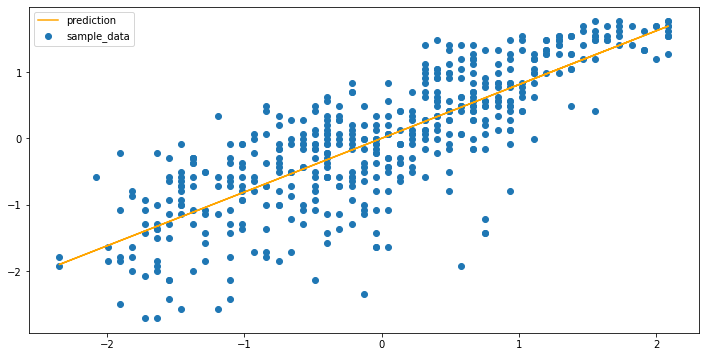

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(x,y,label = 'sample_data')
plt.plot(x,y_hat,color = 'orange',label = 'prediction')
plt.legend()
plt.show()

here we can confirm our claim that with the help of GRE score we can predict chance_of_admit with 65% accuracy

# **linear Regression with multiple variables**

In [ ]:
final_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit',
       'University_Rating_1', 'University_Rating_2', 'University_Rating_3',
       'University_Rating_4', 'Research_no_exp'],
      dtype='object')

In [ ]:
X = final_df[final_df.columns.drop('Chance_of_Admit')]
Y = final_df['Chance_of_Admit']

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(X,Y)

LinearRegression()

In [ ]:
print('cofficient of mlr', mlr.coef_)
print('intercept of mlr',mlr.intercept_)

cofficient of mlr [ 0.14750419  0.12168825  0.01615869  0.10979773  0.50561796 -0.13255078
 -0.19066074 -0.15512491 -0.13951616 -0.1713913 ]
intercept of mlr 0.21203099370035128


In [ ]:
mlr.score(X,Y)

0.8233646419016807

from this we can admit that mulitple regression model is wroking best for this data since **R^2 or Accuracy of the model incresed from 65 % to 82 % in multiple regression model in predicting chance of admission**

In [ ]:
Y_hat = mlr.predict(X)

In [ ]:
error = Y - Y_hat

# checking assumptions of linear regression model

### **The mean of residuals is nearly zero and Normality of residual**

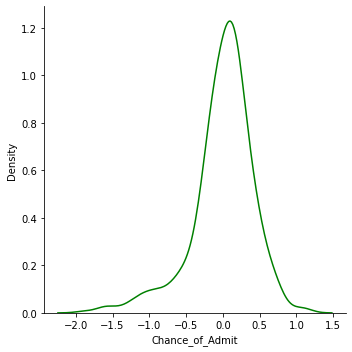

In [ ]:
# assumption of linear regression model , errors should for normal distribution
sns.displot(error, kind = 'kde',color = 'g')
plt.show()

In [ ]:
np.mean(error)

-2.4868995751603507e-17

here we can see **errors are normally distributed for multiple regression model . The mean of residuals is nearly zero**

### **Multicollinearity check by VIF score**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CGPA,4.70
0,GRE_Score,4.41
1,TOEFL_Score,3.91
2,SOP,2.67
9,Research_no_exp,2.47
3,LOR,2.00
6,University_Rating_2,1.78
5,University_Rating_1,1.39
7,University_Rating_3,1.37
8,University_Rating_4,1.27


## recurssive function elemination in multiple linear regression model

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
rf = RFE(lm)

In [ ]:
rf.fit(X,Y)

RFE(estimator=LinearRegression())

In [ ]:
col = X.columns[rf.support_]

In [ ]:
col

Index(['GRE_Score', 'CGPA', 'University_Rating_1', 'University_Rating_2',
       'Research_no_exp'],
      dtype='object')

these are the columns selected by RFE method

In [ ]:
final_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit',
       'University_Rating_1', 'University_Rating_2', 'University_Rating_3',
       'University_Rating_4', 'Research_no_exp'],
      dtype='object')

In [ ]:
columns = ['TOEFL_Score','SOP','LOR','Chance_of_Admit','University_Rating_1', 'University_Rating_2', 'University_Rating_3','University_Rating_4','Research_no_exp']
X_ = final_df[final_df.columns.drop(columns)]
Y_ = final_df['Chance_of_Admit']

In [ ]:
mlr.fit(X_,Y_)

LinearRegression()

In [ ]:
mlr.score(X_,Y_)

0.7995882998588075

we can observe here recduction in r^2
